<center> <h1> <span style="color:black"> Hands-on Machine Learning with Python  </h1> </center> 
<center> <h2> <span style="color:red"> Module 3: Neural networks </h1> </center>

# Structure of the notebook

* [Chapter 1 - Tensors](#one)

* [Chapter 2 - Data sets used in this course](#two)
    + [2.1 MTPL data](#two-one)
    + [2.2 MNIST](#two-two)

* [Chapter 3 - Artificial neural networks](#three)
    + [3.1 Preparing the MNIST dataset](#three-one)
    + [3.2 Your first neural network](#three-two)
    + [3.3 Model evaluation](#three-three)
    + [3.4 Inspecting the calibrated weights](#three-four)

* [Chapter 4 - Fitting a GLM with a Neural network](#four)
    + [4.1 A GLM with only an intercept](#four-one)
    + [4.2 (Your turn) A binomial Neural Network](#four-two)
    + [4.3 Taking exposure into account in a neural network](#four-three)
    + [4.4 Adding a numeric covariates](#four-four)
    + [4.5 Adding a categorical covariate](#four-five)
    + [4.6 CANN - Combined Actuarial Neural Network](#four-six)
    
* [Chapter 5 - More types of neural networks](#five)
    + [5.1 Convolutional neural networks](#five-one)
    + [5.2 Auto encoders](#five-two)

# Chapter 1 - Tensors <a name="one"></a>

**TensorFlow** is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

**Keras** is a high-level neural networks library that is running on the top of TensorFlow. Using Keras in deep learning allows for easy and fast prototyping as well as running seamlessly on CPU and GPU. This framework is written in Python code which is easy to debug and allows ease for extensibility. 

In [ ]:
import keras
import tensorflow as tf

In [ ]:
# create 2D tensor (3x2) with custom values
x = tf.constant([1,2,3,4,5,6], shape = [3,2], dtype=tf.float32); x

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [ ]:
# create 2D tensor (2x2) with only unit values
ones = tf.ones(shape=[2,2], dtype=tf.float32); ones

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# column-wise mean
tf.math.reduce_mean(x, axis = 0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>

In [ ]:
# row-wise mean
tf.math.reduce_mean(x, axis = 1)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.5, 3.5, 5.5], dtype=float32)>

**Note that** Object x is also numpy-compatible, so it is possible to calculate the mean using _np.mean_. _tf.reduce_mean_ is multi-threaded, typically calculated on your GPU. _np.mean_ is calculated on a single CPU.

In [ ]:
import numpy as np

In [ ]:
# row-wise mean
np.mean(x, axis = 1)

array([1.5, 3.5, 5.5], dtype=float32)

In [ ]:
# column-wise mean
np.mean(x, axis = 0)

array([3., 4.], dtype=float32)

In [ ]:
# general matrix mean
np.mean(x)

3.5

**Your turn!**

1. Create a 3-dimensional tensor with values 1,...,12 and shape (2,3,2)
2. Compute the logarithm of the tensor you created. Find the appropriate method in the [tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf). 
3. Calculate the mean over the last axis

**Question 1:** Create a 3-dimensional tensor with values 1,...,12 and shape (2,3,2)

In [ ]:
x = tf.constant(range(1,13), shape = [2,3,2], dtype=tf.float32)
x

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.]],

       [[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]]], dtype=float32)>

**Question 2:** Calculate the logarithm

In [ ]:
tf.math.log(x)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[0.       , 0.6931472],
        [1.0986123, 1.3862944],
        [1.609438 , 1.7917595]],

       [[1.9459102, 2.0794415],
        [2.1972246, 2.3025851],
        [2.3978953, 2.4849067]]], dtype=float32)>

In [ ]:
np.log(x)

array([[[0.       , 0.6931472],
        [1.0986123, 1.3862944],
        [1.609438 , 1.7917595]],

       [[1.9459102, 2.0794415],
        [2.1972246, 2.3025851],
        [2.3978953, 2.4849067]]], dtype=float32)

**Question 3:** Calculate the mean over the last axis

In [ ]:
tf.math.reduce_mean(x, axis = -1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.5,  3.5,  5.5],
       [ 7.5,  9.5, 11.5]], dtype=float32)>

# Chapter 2 - Data sets used in this course <a name="two"></a>

## 2.1 MTPL data <a name="two-one"></a>

We will (once again) use the Motor Third Party Liability data set. There are 163,231 policyholders in this data set.

The frequency of claiming ( nclaims ) and corresponding severity ( avg , the amount paid on average per claim reported by a
policyholder) are the target variables in this data set.

Predictor variables are:
* the exposure-to-risk, the duration of the insurance coverage (max. 1 year)
* factor variables, e.g. gender, coverage, fuel
* continuous, numeric variables, e.g. age of the policyholder, age of the car
* spatial information: postal code (in Belgium) of the municipality where the policyholder resides.  

More details in [Henckaerts et al. (2018, Scandinavian Actuarial Journal)](https://katrienantonio.github.io/projects/2019/06/13/machine-learning/#data-driven) and [Henckaerts et al. (2019, arxiv)](https://katrienantonio.github.io/projects/2019/06/13/machine-learning/#tree-based-pricing).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# load data using separator to correctly parse from .txt
df = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/PC_data.txt", sep=r"\s+")

In [ ]:
# column names to smaller case
df.columns = map(str.lower, df.columns)

In [ ]:
# rename exp to expo
df.rename(columns={'exp':'expo'}, inplace = True); df.head()

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


In [ ]:
# train/test split using sklearn
train, test = train_test_split(df, test_size=0.25, random_state = 0); print(f'train size:{train.shape}, test size:{test.shape}')

train size:(122423, 18), test size:(40808, 18)


In [ ]:
# Reshuffling of the training observations
train = train.sample(frac = 1, random_state = 0)
print(f'train size:{train.shape}')

train size:(122423, 18)


## 2.2 MNIST <a name="two-two"></a>

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


The training data consists of 60,000 28x28 images in black and white (only one channel per pixel).

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The target variable `y` is a vector of numbers indicating the associated digit.

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

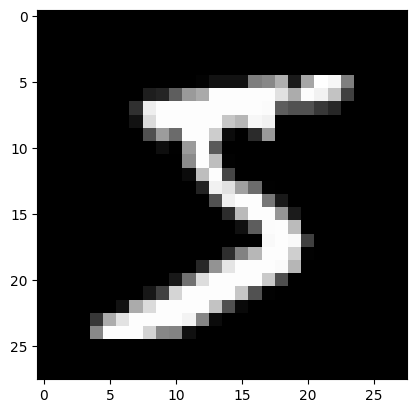

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:], cmap='gray')

# Chapter 3 - Artificial neural networks <a name="three"></a>

## 3.1 Preparing the MNIST dataset <a name="three-one"></a>

The MNIST is a 3D tensor. In our first models we will ignore the intrinsic structure of the data and flatten the data to a 2D tensor, i.e. the table structure we are familiar working with.

In [ ]:
input = tf.reshape(x_train, [len(x_train), 28*28])
test_input = tf.reshape(x_test, [len(x_test), 28*28])

In [ ]:
input.shape

TensorShape([60000, 784])

We transform the target variable from a 1 dimensional tensor into a 2 dimensional tensor with one column per outcome. Instead of predicting the count (regression), we predict 10 binary flags (classifiation).

In [ ]:
output = keras.utils.to_categorical(y_train)
test_output = keras.utils.to_categorical(y_test)

In [ ]:
output.shape

(60000, 10)

In [ ]:
output[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 3.2 Your first neural network <a name="three-two"></a>

Define the model using the **sequential** API in `keras`

In [ ]:
first_model = keras.models.Sequential([
  keras.layers.Dense(units = 512, activation='relu', input_shape = [784]),
  keras.layers.Dense(10, activation = 'softmax')
])

Compile the model by adding a loss function and chosing an optimizer

In [ ]:
first_model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = keras.optimizers.RMSprop(), 
    metrics = ['accuracy']
  )

The **fit()** method shows the following parametrization:
* **x = input_intercept**: input_intercept contains the values of the nodes in the input layer.
* **y = counts**: use the claim counts as target.
* **epochs = 10**: perform 10 training iterations over the complete data.
* **batch_size = 128**: use batches with 128 observations to update weights.
* **validation_split = 0.2**: use 20% of the observations as a hold-out validation set.
* **verbose = 0**: silence keras such that no output is generated during fitting.


In [ ]:
history = first_model.fit(
    x = input,
    y = output,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2,
    verbose = 1
  )

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 7.7122 - accuracy: 0.8887 - val_loss: 1.2025 - val_accuracy: 0.9371
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.8571 - accuracy: 0.9503 - val_loss: 0.9907 - val_accuracy: 0.9502
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.5798 - accuracy: 0.9640 - val_loss: 0.8858 - val_accuracy: 0.9608
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.4752 - accuracy: 0.9707 - val_loss: 0.8519 - val_accuracy: 0.9614
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3898 - accuracy: 0.9758 - val_loss: 0.9241 - val_accuracy: 0.9609
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.3026 - accuracy: 0.9799 - val_loss: 0.9054 - val_accuracy: 0.9651
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.3033 - accuracy: 0.9815 - val_loss: 0.9053 - val_accuracy: 0.9682

The loss on the validation set only decreases in the first few epochs, whereas the loss on the training set keeps decreasing. This is a sign that we are **overfitting** our data. However, accuracy consistently increases on both the training and validation set. The model is becoming **more accurate** (high chance to identify the correct digit), but **overconfident** (probabilities become difficult to interpret).

The `fit()` functions returns a `keras.callbacks.History` object, which can be used to visualize the training history of the model.

In [ ]:
print(history.__class__)
print(history.history.keys())

<class 'keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
history.history['loss']

[7.712244033813477,
 0.8571267127990723,
 0.5798482298851013,
 0.4751700758934021,
 0.3898155987262726,
 0.3026300072669983,
 0.3032919764518738,
 0.27462688088417053,
 0.2516363263130188,
 0.2060937136411667]

We define a function to visualize the history such that we can easily reuse it for future model fits.

In [ ]:
def Visualize_history(history, metric:str) -> None:
  training = history.history[metric]
  validation = history.history[f"val_{metric}"]

  df = pd.concat([
      pd.DataFrame({
        'epoch': range(len(training)), 
        metric: training,
        'group': 'train'
      }),
      pd.DataFrame({
        'epoch': range(len(validation)), 
        metric: validation,
        'group': 'validation'
      })
  ]).reset_index()

  import seaborn as sns
  sns.lineplot(x="epoch", y=metric, hue='group', data=df)

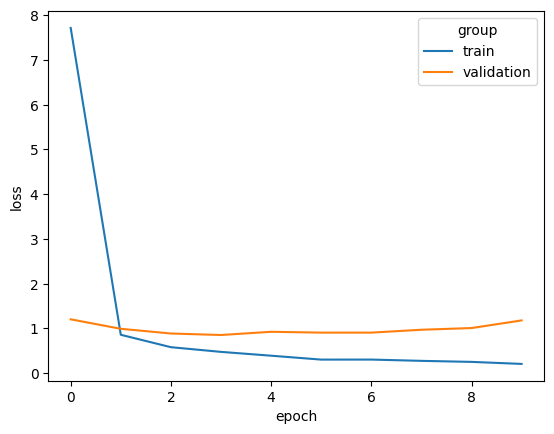

In [ ]:
Visualize_history(history, 'loss')

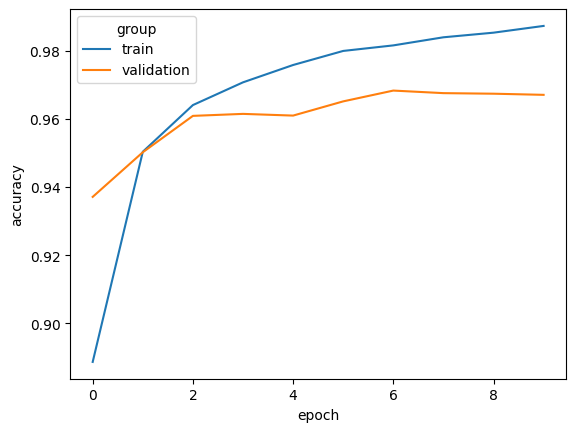

In [ ]:
Visualize_history(history, 'accuracy')

**Your turn!**
Experiment and build your own neural network. Try to obtain a better performance on the training and validation set.

Some ideas:
* Add hidden layers
* Change batch size / number of epochs
* Change the activation function

More ideas can be found on the course sheets!

In [ ]:
model = keras.models.Sequential([
  keras.layers.BatchNormalization(input_shape = [784]),
  keras.layers.GaussianNoise(stddev = .1),
  keras.layers.Dropout(rate = 0.05),
  keras.layers.Dense(units = 128, activation='relu'),
  keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = keras.optimizers.RMSprop(), 
    metrics = ['accuracy']
  )

model.fit(
    x = input,
    y = output,
    epochs = 10,
    batch_size = 1024,
    validation_split = 0.2,
    verbose = 1
  )

Epoch 1/10
47/47 [==============================] - 5s 73ms/step - loss: 0.5195 - accuracy: 0.8498 - val_loss: 0.3468 - val_accuracy: 0.8976
Epoch 2/10
47/47 [==============================] - 2s 49ms/step - loss: 0.2122 - accuracy: 0.9371 - val_loss: 0.1942 - val_accuracy: 0.9456
Epoch 3/10
47/47 [==============================] - 2s 50ms/step - loss: 0.1530 - accuracy: 0.9542 - val_loss: 0.1527 - val_accuracy: 0.9572
Epoch 4/10
47/47 [==============================] - 2s 49ms/step - loss: 0.1199 - accuracy: 0.9656 - val_loss: 0.1417 - val_accuracy: 0.9612
Epoch 5/10
47/47 [==============================] - 3s 66ms/step - loss: 0.0967 - accuracy: 0.9718 - val_loss: 0.1299 - val_accuracy: 0.9649
Epoch 6/10
47/47 [==============================] - 3s 62ms/step - loss: 0.0816 - accuracy: 0.9764 - val_loss: 0.1236 - val_accuracy: 0.9652
Epoch 7/10
47/47 [==============================] - 2s 51ms/step - loss: 0.0688 - accuracy: 0.9803 - val_loss: 0.1170 - val_accuracy: 0.9680
Epoch 8/10
47

## 3.3 Model evaluation <a name="three-three"></a>

**evaluate()** returns the metrics used during training. `categorical_crossentropy` and `accuracy` for our model. Model performance on the test set is similar to performance on the validation set. 

In [ ]:
first_model.evaluate(test_input, test_output, verbose = 0)

[1.0667729377746582, 0.9656999707221985]

**predict()** returns a tensor with the same dimension as the output data. This contains the outcome (probability in our example) assigned to each output node.

In [ ]:
prediction = first_model.predict(test_input)
prediction.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [ ]:
np.set_printoptions(precision=5)
print(prediction[11,:])
print(prediction[11,6])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
0.99999994


The model is **very confident**. We compute the assigned label (highest probability) for each image in the test set.

In [ ]:
prediction[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
labels = np.argmax(prediction, axis=1)  
labels[0:12]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6])

With the labels we can check the accuracy computed earlier.

In [ ]:
np.mean(labels == y_test)

0.9657

In [ ]:
misclassified = np.where(labels != y_test)[0]

In [ ]:
len(misclassified)

343

predicted 3 with probability 0.9999999403953552
actual 2


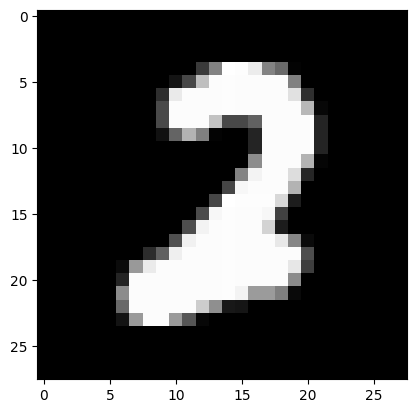

In [ ]:
index = misclassified[1]
print(f"predicted {labels[index]} with probability {prediction[index, labels[index]]}")
print(f"actual {y_test[index]}")
plt.imshow(x_test[index,:,:], cmap='gray')

In [ ]:
prob_correct = np.array([prediction[row, correct] for row, correct in enumerate(y_test)])
lowest_score = np.where(prob_correct.argsort().argsort() < 5)[0]

In [ ]:
prob_correct[lowest_score[0]]

0.0

predicted 5 with probability 0.9999999403953552
actual 9


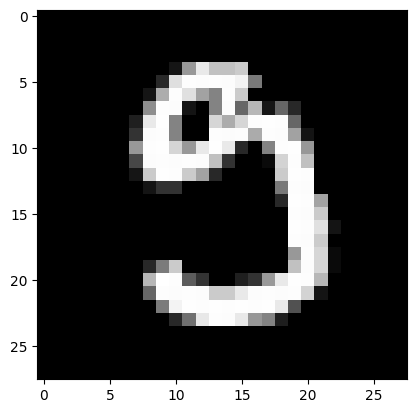

In [ ]:
index = lowest_score[0]
print(f"predicted {labels[index]} with probability {prediction[index, labels[index]]}")
print(f"actual {y_test[index]}")
plt.imshow(x_test[index,:,:], cmap='gray')

In [ ]:
len(prediction[:, y_test])

10000

**your turn!**

Evaluate your model:
* calcualte the accuracy on the test set
* visualize some misclassified images from your model
* generate an image consisting of random noise and let the model classify this image. What do you think of the result? Hint: Your input should be a 1x784 array (or tensor) with values in [0,255].

In [ ]:
noise = np.floor(np.random.rand(1, 28*28) * 256)

In [ ]:
noise.shape

(1, 784)

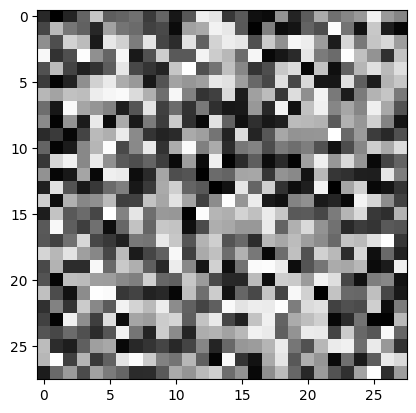

In [ ]:
plt.imshow(np.reshape(noise, (28, 28)), cmap='gray')

In [ ]:
first_model.predict(noise)

1/1 [==============================] - 0s 125ms/step


array([[2.15976e-30, 2.04933e-36, 1.10367e-29, 2.24684e-11, 0.00000e+00,
        7.91924e-13, 9.44730e-19, 8.93278e-37, 1.00000e+00, 1.31171e-38]],
      dtype=float32)

## 3.4 Inspecting the calibrated weights <a name="three-four"></a>

In [ ]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Access the weights of the first layer

In [ ]:
w1 = first_model.layers[0].get_weights()
print(len(w1))
print(w1[0].__class__)
print(w1[0].shape)
print(w1[1].shape)

2
<class 'numpy.ndarray'>
(784, 512)
(512,)


In [ ]:
def visualize_weight(weights:np.ndarray) -> None:
  weights = weights / np.max(np.abs(weights))
  plt.imshow(weights, cmap = 'RdYlGn', alpha = np.abs(weights), vmin=-1, vmax=1)


The trained weights don't tell us much about the features the model has used to classify the digits. Hence, this is a true black box. The pattern might be easier to recognize if we reduce the number of nodes in the first hidden layer.

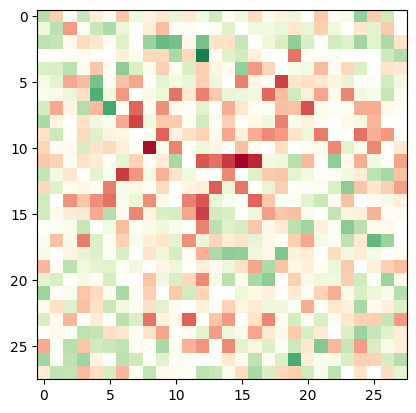

In [ ]:
visualize_weight(np.reshape(w1[0][:,0], (28, 28)))

# Chapter 4 - Fitting a GLM with a Neural Network <a name="four"></a>

## 4.1 A GLM with only an intercept <a name="four-one"></a>

Consider the simplest case of a Poisson GLM with only an intercept:

$$
\begin{align}
Y \sim Poisson(\lambda = \exp(1\cdot\beta))
\end{align}
$$

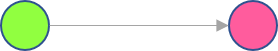

Let's fit a neural network with the following parametrization:
* There is one input node (intercept, constant one)
* There is one output node (number of claims)
* There is one connection from the input to the output node
* There are no hidden layers

In [ ]:
nn_freq_intercept = keras.models.Sequential([
  keras.layers.Dense(units = 1, 
                     activation='exponential',
                     input_shape = [1],
                     use_bias = False)
])

**QUESTION:** how many parameters does this model have?

In [ ]:
# answer
nn_freq_intercept.count_params()

1

In [ ]:
# summary of the structure of the neural netweork
nn_freq_intercept.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


Once the architecture is finished, we compile the model and specify the loss function

* optimizer: algorithm used to calibrate the model.
* loss: loss function to minimize. 

For Poisson regression, we specify **loss = 'poisson'**.



In [ ]:
nn_freq_intercept.compile(optimizer = 'RMSprop', loss = 'poisson', metrics = [tf.keras.metrics.MeanSquaredError()])

In [ ]:
# create input/output vectors
input_intercept = np.ones(train.shape[0])
counts = np.array(train['nclaims'])
print(f'size of input vector: {input_intercept.shape[0]}, size of counts vector: {counts.shape[0]}')

size of input vector: 122423, size of counts vector: 122423


Fit the neural network to the data.

In [ ]:
# fit the neural netword
nn_freq_intercept.fit(x = input_intercept,
                      y = counts,
                      epochs = 30,
                      batch_size = 1024,
                      validation_split = 0,
                      verbose = 0)

In [ ]:
# get_weights()
float(nn_freq_intercept.get_weights()[0])

-2.088635206222534

In [ ]:
# prepare test data
input_intercept_test = np.ones(test.shape[0])
counts_test = np.array(test['nclaims'])
exposure_test = np.array(test['expo'])

In [ ]:
# evaluate the model on the test data using `evaluate`
print(f'size of input vector: {input_intercept_test.shape[0]}, size of counts vector: {counts_test.shape[0]}')
results = nn_freq_intercept.evaluate(input_intercept_test, counts_test, verbose=0)
print("test Poisson loss, test MSE:", results)

size of input vector: 40808, size of counts vector: 40808
test Poisson loss, test MSE: [0.37777119874954224, 0.1322314590215683]


**Note**: This is the average loss per observation. The total loss is obtained by multiplying the average loss per observation by the total number of observations.

We compare the results of our neural network with the same model specified as a GLM:

In [ ]:
import statsmodels.api as sm
glm_freq_intercept = sm.formula.glm("nclaims ~ 1", data=train, family=sm.families.Poisson()).fit()
glm_freq_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nclaims   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122422
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48161.
Date:                Mon, 13 Mar 2023   Deviance:                       67871.
Time:                        10:06:18   Pearson chi2:                 1.34e+05
No. Iterations:                     6   Pseudo R-squ. (CS):          1.110e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0813      0.008   -257.228      0.000      -2.097      -2.065
==============================================================================
"""

To compare the in-sample deviance of the neural network and the GLM, we have to manually compute the deviance of the neural network:





$$
\begin{align}
\mathcal{D}= 2 \cdot \sum_{i}{Y_i \cdot \log\left(\frac{Y_i}{\mu_i}\right) - (Y_i - \mu_i)},
\end{align}
$$
where $\log\left(\frac{Y_i}{\mu_i}\right)$ is set to zero when $Y_i = 0$.

In [ ]:
mu = nn_freq_intercept.predict(input_intercept)[:,0]

3826/3826 [==============================] - 6s 2ms/step


In [ ]:
# deviance residuals of poisson neural regression
mu = nn_freq_intercept.predict(input_intercept)[:,0]  # [:,0] selects the predictions for the first output node
log_ratio = np.where(counts == 0, 0, np.log(counts / mu))

deviance_nn = 2 * sum(counts * log_ratio - (counts - mu))

deviance_nn

3826/3826 [==============================] - 7s 2ms/step


<ipython-input-139-48372648550d>:3: RuntimeWarning: divide by zero encountered in log
  log_ratio = np.where(counts == 0, 0, np.log(counts / mu))


67608.40311386411

In [ ]:
# comparing the estimated parameter (difference reflects a different optimization technique)
print(f'NN weights:{float(nn_freq_intercept.get_weights()[0])}, \nGLM coefficients:{float(glm_freq_intercept.params)}')

NN weights:-2.088635206222534, 
GLM coefficients:-2.081264755864604


## 4.2 Your Turn! <a name="four-two"></a>

**QUESTION 1:** adapt this code to replicate a **binomial** GLM with a **logit link function**. Add **accuracy** as a metric in your model. Consider the following hint:
* _Hint 1:_ the sigmoid activation function is the inverse of the logit link function.
* _Hint 2:_ the binary_crossentropy loss maximizes the loglikelihood of Bernoulli outcomes:
$$
\begin{align}
\sum^{n}_{i=1}{(y_{i}\cdot log(p_{i})+(1-y_{i})\cdot log(1-p_{i})).}
\end{align}
$$

**QUESTION 2:** fit your neural network.

**QUESTION 3:** compare your fitted neural network with a GLM.
* _Hint 1:_ to accomodate the fitting of the logistic regression of a categorical vector, we create a binary proxy variable nclaims_proxy with the following characteristics:
    * proxy = 0 when x = 0
    * proxy = 1 when x > 0

## 4.3 Taking exposure into account in a neural network <a name="four-three"></a>

$$
\begin{align}
Y \sim Poisson(\lambda = expo \cdot \exp(1\cdot\beta))
\end{align}
$$

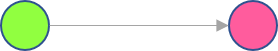

The Poisson loss function, including exposure, is:
$$
\begin{align}
\mathcal{L}=\sum_{i}{expo_{i}\cdot \lambda_{i}-y_{i}\cdot log(expo_{i}\cdot \lambda_{i})},
\end{align}
$$
which is proportional to:
$$
\begin{align}
\mathcal{L}=\sum_{i}{expo_{i}\cdot (\lambda_{i}-\frac{y_{i}}{expo_{i}}log(\lambda_{i}))}.
\end{align}
$$

This is the loss of a Poisson model with:
* observations $\frac{y_{i}}{expo_{i}}$ and
* weights $expo_{i}$

Notice indeed how the parameter estimates of the following two GLMs are identical.

a) Including **expo** as an offset

In [ ]:
# GLM with offset
glm_offset = sm.formula.glm("nclaims ~ 1", 
                            data=train, 
                            offset = np.log(train.expo),
                            family=sm.families.Poisson()).fit(); 
glm_offset.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nclaims   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122422
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48129.
Date:                Mon, 13 Mar 2023   Deviance:                       67807.
Time:                        10:25:41   Pearson chi2:                 1.51e+05
No. Iterations:                     6   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9651      0.008   -242.870      0.000      -1.981      -1.949
==============================================================================
"""

b) Including **expo** as weights

In [ ]:
# GLM including weights
train['claims_per_expo'] = train.nclaims / train.expo

glm_weights = sm.formula.glm("claims_per_expo ~ 1", 
                             data=train, 
                             freq_weights = train.expo, 
                             family=sm.families.Poisson()).fit(); 
glm_weights.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        claims_per_expo   No. Observations:               122423
Model:                            GLM   Df Residuals:                108994.98
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47377.
Date:                Mon, 13 Mar 2023   Deviance:                       67807.
Time:                        10:39:44   Pearson chi2:                 1.51e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9651      0.008   -242.870      0.000      -1.981      -1.949
==============================================================================
"""

We use the weight argument to also include exposure in our Neural Networks.

In [ ]:
# neural network architecture specification
nn_freq_exposure = tf.keras.models.Sequential()
nn_freq_exposure.add(tf.keras.layers.Dense(units = 1, activation = 'exponential', input_shape = (1,), use_bias = False))
nn_freq_exposure.compile(optimizer = 'RMSprop', loss = 'poisson')

Remark that the archetecture of our Neural Network remains the same

In [ ]:
# create a vector with exposure values
exposure = np.array(train['expo']) # pd.Series must be converted to pd.array due to compatibility reasons with fit() method

In [ ]:
# divide claim counts by exposure and use weights
nn_freq_exposure.fit(x = input_intercept,
                     y = counts/exposure,
                     sample_weight = exposure,
                     epochs = 20,
                     batch_size = 1024,
                     validation_split = 0,
                     verbose = 0)

In [ ]:
# get_weights()
float(nn_freq_exposure.get_weights()[0])

-1.9742530584335327

In [ ]:
# comparing the estimated parameter (difference reflects a different optimization technique)
print(f'NN weights:{nn_freq_exposure.get_weights()[0][0][0]}, \n\nGLM_offset coefficients:{glm_offset.params}, \n\nGLM_weights coefficients:{glm_weights.params}')

NN weights:-1.9742530584335327, 

GLM_offset coefficients:Intercept   -1.965093
dtype: float64, 

GLM_weights coefficients:Intercept   -1.965093
dtype: float64


## 4.4 Adding covariates <a name="four-four"></a>

$$
\begin{align}
Y \sim Poisson(\lambda = expo \cdot \exp(\beta_0 + ageph \cdot \beta))
\end{align}
$$

We now fit a frequency model with:
* An intercept
* A single covariate age

In [ ]:
# create a vector with ageph (pd.Series must be converted to pd.array due to compatibility reasons with fit() method)
ageph = np.array(train['ageph'])

In [ ]:
# neural network architecture specification
nn_freq_ageph = keras.models.Sequential([
  keras.layers.BatchNormalization(input_shape = [1]),
  keras.layers.Dense(units = 5, activation='tanh'),
  keras.layers.Dense(units = 1, activation='exponential', use_bias = True)
])
nn_freq_ageph.compile(optimizer = 'RMSprop', loss = 'poisson')

In [ ]:
nn_freq_ageph.fit(ageph, # ageph is now our input
                 counts/exposure,
                 sample_weight = exposure,
                 epochs = 60,
                 batch_size = 1024,
                 validation_split = 0,
                 verbose = 0)

Compare with a GLM fitted to a binned ageph covariate

In [ ]:
# bin for train dataset
bins = [17, 22, 30, 40, 50, 60, 70, 80, 120]
train['ageph_binned'] = pd.cut(train['ageph'], bins = bins); print(train.ageph_binned.value_counts());

(40, 50]     29102
(30, 40]     28177
(50, 60]     21135
(22, 30]     16608
(60, 70]     16494
(70, 80]      8175
(17, 22]      1618
(80, 120]     1114
Name: ageph_binned, dtype: int64


In [ ]:
glm_age_binned = sm.formula.glm("nclaims ~ ageph_binned", 
                            data=train, 
                            offset = np.log(train.expo),
                            family=sm.families.Poisson()).fit(); 

Compare both models

3/3 [==============================] - 0s 4ms/step


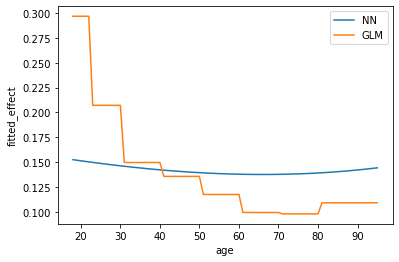

In [ ]:
# plotting
age = np.array(range(18,96))
age_binned = pd.cut(age, bins = bins);
glm_pred = glm_age_binned.predict(pd.DataFrame({'ageph_binned':age_binned}))
nn_pred = nn_freq_ageph.predict(age)


plt.plot(age, nn_pred, label = 'NN')
plt.plot(age, glm_pred, label = "GLM")
plt.xlabel('age')
plt.ylabel('fitted_effect')
plt.legend()
plt.show()

The Neural Network fits a smooth age effect, but does not capture:
* The elevated risk for young drivers
* The increased risk at old ages

For simple problems, simple models and expert opinion is often better suited than Neural Networks. At the same time Neural Networks are very good at finding complex patterns and interactions in the data.

## 4.5 Adding one categorical covariate <a name="four-five"></a>

$$
\begin{align}
Y \sim Poisson(\lambda = expo \cdot \exp(\beta_0 + ageph \cdot \beta_1 + coverage_{cat1} \cdot \beta_2 + coverage_{cat2} \cdot \beta_3 + coverage_{cat3} \cdot \beta_4))
\end{align}
$$

In [ ]:
# tensorflow tool to hot-encode and perform hot encoding
from keras.utils import to_categorical

In [ ]:
ageph_continuous = np.array(train['ageph'])

In [ ]:
coverage_hot = to_categorical(train['coverage'].astype('category').cat.codes, num_classes = train['coverage'].unique().shape[0])

In [ ]:
# input data for training the network
data_nn_hot = np.concatenate((ageph.reshape(-1,1), coverage_hot), axis = 1)

In [ ]:
# neural network architecture specification
nn_freq_ageph_cov = tf.keras.models.Sequential()
nn_freq_ageph_cov.add(tf.keras.layers.Dense(units = 1, activation = 'exponential', input_shape = (data_nn.shape[1],), use_bias = True)) # Notice how we set use_bias = TRUE for the intercept.
nn_freq_ageph_cov.compile(optimizer = 'RMSprop', loss = 'poisson')

In [ ]:
age = np.array(range(18,96), dtype = np.int32)

test_data_nn_1 = pd.DataFrame({'age':age,
                             'c1':np.repeat(1., len(range(18,96))),
                             'c2':np.repeat(0., len(range(18,96))),
                             'c3':np.repeat(0., len(range(18,96)))}).values

test_data_nn_2 = pd.DataFrame({'age':age,
                             'c1':np.repeat(0., len(range(18,96))),
                             'c2':np.repeat(1., len(range(18,96))),
                             'c3':np.repeat(0., len(range(18,96)))}).values

test_data_nn_3 = pd.DataFrame({'age':age,
                             'c1':np.repeat(0., len(range(18,96))),
                             'c2':np.repeat(0., len(range(18,96))),
                             'c3':np.repeat(1., len(range(18,96)))}).values

In [ ]:
nn_freq_ageph_cov.fit(data_nn_hot, # ageph is now our input
            (counts/exposure),
            sample_weight = exposure,
            epochs = 60,
            batch_size = 1024,
            validation_split = 0,
            verbose = 1)

Epoch 1/60
120/120 [==============================] - 0s 473us/step - loss: 1.4368
Epoch 2/60
120/120 [==============================] - 0s 342us/step - loss: 0.8430
Epoch 3/60
120/120 [==============================] - 0s 342us/step - loss: 0.4262
Epoch 4/60
120/120 [==============================] - 0s 375us/step - loss: 0.3999
Epoch 5/60
120/120 [==============================] - 0s 392us/step - loss: 0.3938
Epoch 6/60
120/120 [==============================] - 0s 392us/step - loss: 0.3886
Epoch 7/60
120/120 [==============================] - 0s 325us/step - loss: 0.3841
Epoch 8/60
120/120 [==============================] - 0s 400us/step - loss: 0.3803
Epoch 9/60
120/120 [==============================] - 0s 417us/step - loss: 0.3770
Epoch 10/60
120/120 [==============================] - 0s 333us/step - loss: 0.3743
Epoch 11/60
120/120 [==============================] - 0s 333us/step - loss: 0.3721
Epoch 12/60
120/120 [==============================] - 0s 342us/step - loss: 0.3702
E

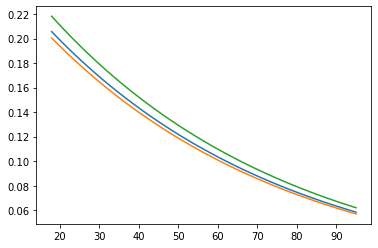

In [ ]:
plt.plot(age, nn_freq_ageph_cov.predict(test_data_nn_1).reshape(-1))
plt.plot(age, nn_freq_ageph_cov.predict(test_data_nn_2).reshape(-1))
plt.plot(age, nn_freq_ageph_cov.predict(test_data_nn_3).reshape(-1))

In [ ]:
# label 
glm_age_coverage = sm.formula.glm("nclaims ~ ageph + coverage", 
                            data = train, 
                            offset = np.log(train.expo),
                            family = sm.families.Poisson()).fit(); 
glm_age_coverage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nclaims   No. Observations:               122423
Model:                            GLM   Df Residuals:                   122419
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47435.
Date:                Fri, 11 Mar 2022   Deviance:                       66626.
Time:                        14:13:31   Pearson chi2:                 1.49e+05
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006613
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2795      0.034    -38.174      0.000      -1.345      -1.214
coverage[T.PO]     -0.0299      0.027     -1.102      0.270      -0.083       0.023
coverage[T.TPL]     0.0549      0.024      2.243      0.025       0.007       0.103
ageph              -0.0157      0.001    -27.353      0.000      -0.017      -0.015
===================================================================================
"""

## 4.6 CANN - Combined Actuarial Neural Network <a name="four-six"></a>

Can we combine the insides of a well understood actuarial model with the flexibility of a Neural Network: <a href='https://www.cambridge.org/core/journals/astin-bulletin-journal-of-the-iaa/article/editorial-yes-we-cann/66E8BEC373B5CCEF3BF3303D442D6B75' target='_blank'>Yes we CANN!</a>

Using a skip connection we immediately connect the output of our GLM model with the output of the Neural Network

<figure>
<img src="https://github.com/loremarchi/hands-on-machine-learning-R-module-3-python/blob/main/imgs/skip_conn.png?raw=1" alt="autoencoder_schema" style="width: 300px;"/>
<figcaption><center>Figure taken from <a href="https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3320525">Schelldorfer and Wuthrich (2019)</a>.<p></p></center></figcaption>
</figure>

For the implementation of this model, we have to leave the sequential API as there is no longer a single path from input to output

In [ ]:
# When using the procedural API, we have to explicitely define the input layers
# In this case, there are two input layers, one for the covariates and one for the skip connection.

input_nn = tf.keras.layers.Input(shape = (1,), name = 'nn')
input_skip = tf.keras.layers.Input(shape = (1,), name = 'skip')

In [ ]:
# Each layer is defined as a function of the previous layer in the network
norm_nn = tf.keras.layers.BatchNormalization()(input_nn)
dense_1 = tf.keras.layers.Dense(units = 16, activation = 'relu')(norm_nn)
# Notice we use a linear activation function. Only after combination with the skip connection we apply the exponential activation function
output_nn = tf.keras.layers.Dense(units = 1, activation = 'linear')(dense_1) 

In [ ]:
# Combine the output of the first part of the neural network with the skip connection via layer_add 
interm = tf.keras.layers.Add()([output_nn, input_skip])

Finally we want to apply the exponential function to the sum of output_nn and input_skip. We acthieve this by adding a dense layer with fixed weights one for both inputs and an exponential activation function. The model then computes:

$$
\begin{align}
output = \exp(1 \cdot \texttt{output_nn} + 1 \cdot \texttt{input_skip})
\end{align}
$$



In [ ]:
init = tf.constant_initializer(np.ones((1,1)))
output = tf.keras.layers.Dense(units = 1, 
                               activation = 'exponential', 
                               trainable = False,
                               kernel_initializer = init,
                               name = 'output')(interm)

In [ ]:
# Finally we compile the full model
cann = tf.keras.models.Model(inputs = [input_nn, input_skip], outputs = output)
cann.compile(optimizer = 'RMSprop', loss = 'poisson', metrics = [tf.keras.metrics.MeanSquaredError()])

Tensorflow is endowed with a specific utility to visualize the structure of the network. We can indeed see the skip connection via layer_add:

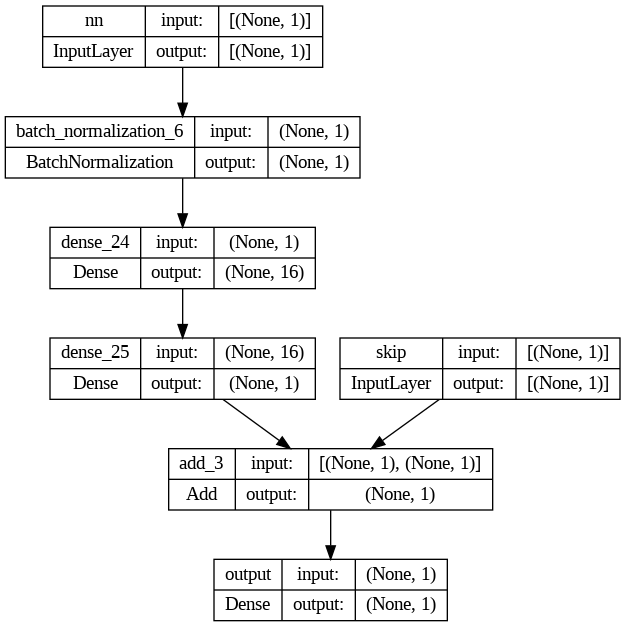

In [ ]:
# model structure
tf.keras.utils.plot_model(model=cann, show_shapes=True)

In [ ]:
skip_glm = glm_age_binned.predict(linear = True)

Collect the CANN input data in a named list:

In [ ]:
cann_input = {'nn':np.array(train['ageph']), 'skip':np.array(skip_glm)}

Fit the CANN like we have seen before:

In [ ]:
# we no longer include exposure as exposure is included via the skip connection
cann.fit(x = cann_input,
         y = counts,
         epochs = 4,
         batch_size = 1024,
         validation_split = 0,
         verbose = 1)

Epoch 1/4
120/120 [==============================] - 2s 2ms/step - loss: 0.3787 - mean_squared_error: 0.1339
Epoch 2/4
120/120 [==============================] - 0s 3ms/step - loss: 0.3776 - mean_squared_error: 0.1335
Epoch 3/4
120/120 [==============================] - 0s 2ms/step - loss: 0.3776 - mean_squared_error: 0.1335
Epoch 4/4
120/120 [==============================] - 0s 2ms/step - loss: 0.3775 - mean_squared_error: 0.1335


In [ ]:
age = np.array(list(range(18,96)))
skip_zeros = np.zeros(age.shape[0])
age_skip_0 = pd.DataFrame({'ageph':age,
                           'skip':skip_zeros})
age_skip_0['cann'] = cann.predict(x={'nn':tf.cast(age_skip_0['ageph'], dtype = tf.float32),
                                     'skip':tf.cast(age_skip_0['skip'], dtype = tf.float32)})

3/3 [==============================] - 0s 3ms/step


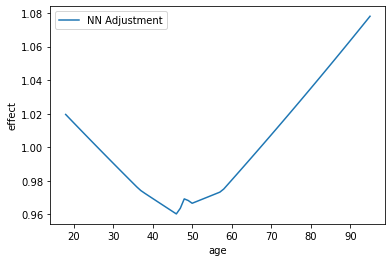

In [ ]:
plt.plot(age_skip_0.ageph, age_skip_0.cann, label = "NN Adjustment")
plt.xlabel('age')
plt.ylabel('effect')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'ageph':np.array(range(18,96)),
                   'skip': np.log(glm_pred)})

df['cann'] = cann.predict(x={'nn':tf.cast(df.ageph, dtype = tf.float32), 
                             'skip':tf.cast(df.skip, dtype = tf.float32)}); df.head()

3/3 [==============================] - 0s 4ms/step


,ageph,skip,cann
0,18,-1.214386,0.302694
1,19,-1.214386,0.301967
2,20,-1.214386,0.301242
3,21,-1.214386,0.300519
4,22,-1.214386,0.299797


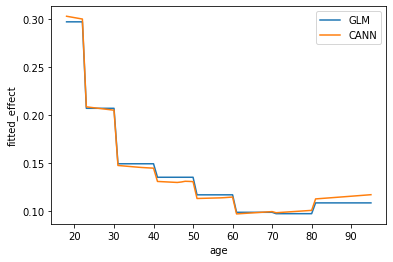

In [ ]:
# plotting
plt.plot(age, np.exp(df.skip), label = "GLM") # note that we transform the data via np.exp
plt.plot(age, df.cann, label = "CANN")
plt.xlabel('age')
plt.ylabel('fitted_effect')
plt.legend()
plt.show()

# Chapter 5 - More types of neural networks <a name="five"></a>

## 5.1 Convolutional neural networks <a name="five-one"></a>

Format the data such that it has the correct dimensions

In [ ]:
input_train = tf.expand_dims(x_train, axis = -1)
input_test = tf.expand_dims(x_test, axis = -1)

In [ ]:
output_train = keras.utils.to_categorical(y_train)
output_test = keras.utils.to_categorical(y_test)

Define the model, we use one convolutional layer after which we flatten the result and connect it to the output nodes using a dense layer.

In [ ]:
model_conv = keras.models.Sequential([
    keras.layers.Conv2D(
        filters = 8,
        kernel_size = (3, 3),
        strides = (1, 1),
        input_shape = (28, 28, 1)
    ),
    keras.layers.MaxPool2D(
        pool_size = (2, 2),
        strides = (2, 2)
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 10, activation = 'softmax')
  ])

model_conv.compile(
    loss = 'categorical_crossentropy', 
    optimizer = keras.optimizers.RMSprop(), 
    metrics = ['accuracy']
  )

model_conv.fit(
    x = input_train,
    y = output_train,
    epochs = 10,
    batch_size = 1024,
    validation_split = 0.2,
    verbose = 1
  )

Epoch 1/10
47/47 [==============================] - 14s 286ms/step - loss: 8.4282 - accuracy: 0.7024 - val_loss: 2.7186 - val_accuracy: 0.8453
Epoch 2/10
47/47 [==============================] - 11s 244ms/step - loss: 1.9492 - accuracy: 0.8733 - val_loss: 1.3905 - val_accuracy: 0.8984
Epoch 3/10
47/47 [==============================] - 11s 241ms/step - loss: 1.1568 - accuracy: 0.9045 - val_loss: 0.8589 - val_accuracy: 0.9302
Epoch 4/10
47/47 [==============================] - 12s 266ms/step - loss: 0.7718 - accuracy: 0.9243 - val_loss: 0.8153 - val_accuracy: 0.9173
Epoch 5/10
47/47 [==============================] - 19s 411ms/step - loss: 0.5679 - accuracy: 0.9348 - val_loss: 0.5879 - val_accuracy: 0.9379
Epoch 6/10
47/47 [==============================] - 12s 252ms/step - loss: 0.4406 - accuracy: 0.9433 - val_loss: 0.5520 - val_accuracy: 0.9390
Epoch 7/10
47/47 [==============================] - 11s 243ms/step - loss: 0.3703 - accuracy: 0.9486 - val_loss: 0.4385 - val_accuracy: 0.9486

The trained model has a lower loss on the training data set than the artificial neural network trained earlier. Performance on the test set is similar to the performance on the validation set.

In [ ]:
model_conv.evaluate(input_test, output_test, verbose = 0)

[0.36446139216423035, 0.9503999948501587]

Visualize some of the kernels

In [ ]:
filters = model_conv.layers[0].get_weights()[0]
filters.shape

(3, 3, 1, 8)

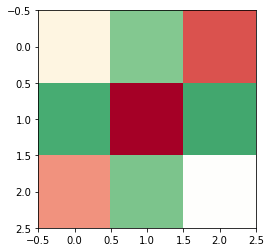

In [ ]:
visualize_weight(np.reshape(filters[:,:,:,0], (3, 3)))

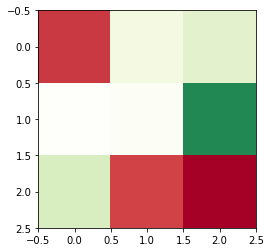

In [ ]:
visualize_weight(np.reshape(filters[:,:,:,5], (3, 3)))

## 5.2 Auto encoders <a name="five-two"></a>

Divide input data by 255 to obtain values in (0, 1) since the activation function we will use in the final layer will be restricted to the domain (0, 1)

In [ ]:
input_train_flatten = tf.reshape(x_train, [len(x_train), 28*28]) / 255
input_train_flatten.shape

TensorShape([60000, 784])

In [ ]:
# encode the input
input_encoder = tf.keras.layers.Input(shape = (784,))
layer1 = keras.layers.Dense(units = 128, activation = 'sigmoid', input_shape = [784])(input_encoder)
encoder = keras.layers.Dense(units = 32, activation = 'sigmoid')(layer1)

# decode the input
layer3 = keras.layers.BatchNormalization()(encoder)
layer4 = keras.layers.Dense(units = 128, activation = 'sigmoid')(layer3)
decoded = keras.layers.Dense(units = 784, activation = 'sigmoid')(layer4)

model = keras.models.Model(inputs = input_encoder, outputs = decoded)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = keras.optimizers.RMSprop(), 
    metrics = ['mse']
)

model.fit(
    x = input_train_flatten,
    y = input_train_flatten,
    epochs = 10,
    batch_size = 1024,
    validation_split = 0.2,
    verbose = 1
  )


Epoch 1/10
47/47 [==============================] - 4s 61ms/step - loss: 0.3335 - mse: 0.0852 - val_loss: 0.2672 - val_mse: 0.0671
Epoch 2/10
47/47 [==============================] - 4s 85ms/step - loss: 0.2650 - mse: 0.0675 - val_loss: 0.2624 - val_mse: 0.0669
Epoch 3/10
47/47 [==============================] - 3s 56ms/step - loss: 0.2564 - mse: 0.0653 - val_loss: 0.2466 - val_mse: 0.0620
Epoch 4/10
47/47 [==============================] - 3s 56ms/step - loss: 0.2426 - mse: 0.0610 - val_loss: 0.2352 - val_mse: 0.0583
Epoch 5/10
47/47 [==============================] - 3s 56ms/step - loss: 0.2245 - mse: 0.0546 - val_loss: 0.2125 - val_mse: 0.0502
Epoch 6/10
47/47 [==============================] - 3s 74ms/step - loss: 0.2052 - mse: 0.0480 - val_loss: 0.1977 - val_mse: 0.0454
Epoch 7/10
47/47 [==============================] - 3s 65ms/step - loss: 0.1931 - mse: 0.0439 - val_loss: 0.1878 - val_mse: 0.0418
Epoch 8/10
47/47 [==============================] - 3s 58ms/step - loss: 0.1847 - m

Test the autoencoder by feeding it input images

In [ ]:
result = model.predict(input_train_flatten)

1875/1875 [==============================] - 5s 2ms/step


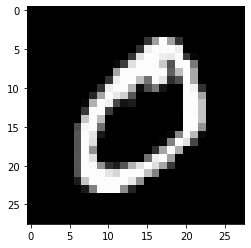

In [ ]:
plt.imshow(np.reshape(input_train_flatten[1,:], (28, 28)), cmap='gray')

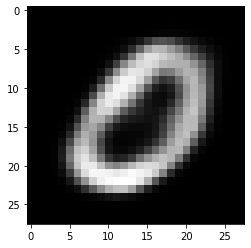

In [ ]:
plt.imshow(np.reshape(result[1,:], (28, 28)), cmap='gray')

Test the autoencoder by feeding it random noise

1/1 [==============================] - 0s 90ms/step


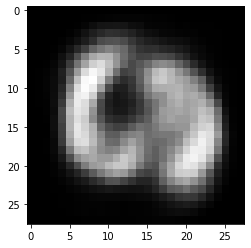

In [ ]:
noise = np.floor(np.random.rand(1, 28*28) * 256)
plt.imshow(np.reshape(model.predict(noise), (28, 28)), cmap='gray')

## 5.3 Tuning a neural network <a name="five-three"></a>
In this section we tune some hyperparameters when fitting our autoencoder. The chosen hyperparameters are:
* neurons_layer1: The number of nodes in the first (and last) layer of the autoencoder
* activation: The activation function used
* normalize: Should a batch normalization layer be added in the middle of the model
* batch_size: Batch size used when training the model

These are just some of the potential hyperparameters. Many more can be chosen, but the more options we choose, the longer hyperparameter tuning will take.

As hyperparameter combinations grow fast, we don't want to test every combination. We are using `Optimzer` from scikit-optimize (skopt) to  efficiently scan the tuning grid.

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import Optimizer
from skopt.utils import dimensions_aslist
from skopt.space.space import Real, Categorical, Integer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

We define a grid of values over which we will tune. In `skopt` we can define the type of each tuning parameter `Integer`, `Real`, `Categorical`. 

In [ ]:
# First we define a grid of values over which we will tune
param_grid = {
    'neurons_layer1': Integer(256, 512),
    'activation': Categorical(['sigmoid', 'relu', 'tanh']),
    'normalize': Categorical(['yes', 'no']),
    'batch_size': Integer(128, 2048, "log-uniform")
}

In [ ]:
# And a function that we want to optimize
def fit_autoencoder(param):

  # define, compile and fit the model on a given train and test data set
  def score_model(train, test):
    model = keras.models.Sequential([
          keras.layers.Dense(units = param['neurons_layer1'], activation = param['activation'], input_shape = [784]),
          keras.layers.Dense(units = 32, activation = param['activation'])
    ])

    if param['normalize'] == 'yes':
      model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Dense(units = param['neurons_layer1'], activation = param['activation']))
    model.add(keras.layers.Dense(units = 784, activation = param['activation']))

    model.compile(
        loss = 'binary_crossentropy',
        optimizer = keras.optimizers.RMSprop()
    )

    model.fit(
      x = train,
      y = train,
      epochs = 5,
      batch_size = param['batch_size'],
      validation_split = 0,
      verbose = 0
    )

    return (model.evaluate(test, test))

  # Split the data into folds for cross-validation. We choose 2 folds here to speed up the demonstration. 
  # In an actual fitting procedure, it is better to choose a larger number of folds (e.g. 5).
  # We specify the random_state such that for each parameter combination the data is split into the same folds.
  folds = KFold(n_splits=2, shuffle=True, random_state=1).split(input_train_flatten, input_train_flatten)
  
  # compute the score on each fold
  scores = []
  for fold in folds:

    scores.append(
        score_model(
            train = np.array(input_train_flatten)[fold[0],:],
            test = np.array(input_train_flatten)[fold[0],:]
            )        
    )

  # combine the scores in a single metric
  return np.sum(scores)

In [ ]:
# test the function with a single param combination
param = {
    'neurons_layer1': 256,
    'activation': 'tanh',
    'normalize': 'yes',
    'batch_size': 2048
}
fit_autoencoder(param)

In [ ]:
# create an optimizer; This will sugest new parameters to test based on the 
# results found for previous parameters
optimizer = Optimizer(
    dimensions = dimensions_aslist(param_grid),
    random_state = 1,
    base_estimator = 'gp',
    n_initial_points = 3
)

In [ ]:
# We test 5 parameter combinations as fitting these models takes a lot of time
# In practice you want to test more parameter combinations
for i in range(5):
  hyperparameter = optimizer.ask()
  hyperparameter_dict = dict(zip(sorted(param_grid.keys()), hyperparameter))
  print(hyperparameter_dict)
  score = fit_autoencoder(hyperparameter_dict)
  optimizer.tell(hyperparameter, score)

In [ ]:
# tested combinations
optimizer.Xi

In [ ]:
# results
optimizer.yi